## Google Play Store apps and reviews

<ul>
<li><code>apps.csv</code>: contains all the details of the applications on Google Play. There are 13 features that describe a given app.</li>
<li><code>user_reviews.csv</code>: contains 100 reviews for each app, <a href="https://www.androidpolice.com/2019/01/21/google-play-stores-redesigned-ratings-and-reviews-section-lets-you-easily-filter-by-star-rating/">most helpful first</a>. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.</li>
</ul>

In [1]:
# Reading the dataset
import pandas as pd
apps_with_duplicates = pd.read_csv("datasets/apps.csv")

# Dropping duplicates from apps_with_duplicates
apps = apps_with_duplicates.drop_duplicates()

print('Total number of apps in the dataset = ', len(apps))
print(apps.sample(5))

Total number of apps in the dataset =  9659
      Unnamed: 0                                             App   Category  \
4299        5253                          AJ Rafael Music Lyrics     FAMILY   
6185        7229  Pregnancy Tracker & Countdown to Baby Due Date  PARENTING   
4142        5093                                        SOLEM AG      TOOLS   
5682        6713                        GearBest Online Shopping   SHOPPING   
2327        2978                     MARCA - Sports Leader Diary     SPORTS   

      Rating  Reviews  Size     Installs  Type Price Content Rating  \
4299     NaN        0   8.4          50+  Free     0   Everyone 10+   
6185     4.7   658087  62.0  10,000,000+  Free     0       Everyone   
4142     NaN        1  51.0       1,000+  Free     0       Everyone   
5682     4.5   245104  35.0   5,000,000+  Free     0       Everyone   
2327     3.9    76346  14.0   5,000,000+  Free     0       Everyone   

             Genres        Last Updated Current Ver   

## 2. Data cleaning

In [2]:
# List of characters to remove
chars_to_remove = ["+",",","$"]
# List of column names to clean
cols_to_clean = ["Installs","Price"]

# Loop for each column in cols_to_clean
for col in cols_to_clean:
    # Loop for each char in chars_to_remove
    for char in chars_to_remove:
        # Replace the character with an empty string
        apps[col] = apps[col].apply(lambda x: x.replace(char, ""))
        
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.1+ MB
None


## 3. Correcting data types

In [3]:
import numpy as np

# Converting Installs to float data type
apps["Installs"] = apps["Installs"].astype(np.float64)

# Converting Price to float data type
apps["Price"] = apps["Price"].astype(np.float64)

# Checking dtypes of the apps dataframe
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   float64
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   float64
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 1.1+ MB
None


## 4. Exploring app categories
<ul>
<li>Which category has the highest share of (active) apps in the market? </li>
<li>Is any specific category dominating the market?</li>
<li>Which categories have the fewest number of apps?</li>
</ul>

In [4]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

num_categories = apps['Category'].nunique()
print('Number of categories = ', num_categories)

# Counting the number of apps in each 'Category'. 
num_apps_in_category = apps['Category'].value_counts()

# Sorting num_apps_in_category in descending order based on the count of apps in each category
sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending=False)
data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

Number of categories =  33


## 5. Distribution of app ratings

In [5]:
# Average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating']
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average app rating =  4.173243045387998


## 6. Size and price of an app
<ul>
<li>Does the size of an app affect its rating? </li>
<li>Do users really care about system-heavy apps or do they prefer light-weighted apps? </li>
<li>Does the price of an app affect its rating? </li>
<li>Do users always prefer free apps over paid apps?</li>
</ul>

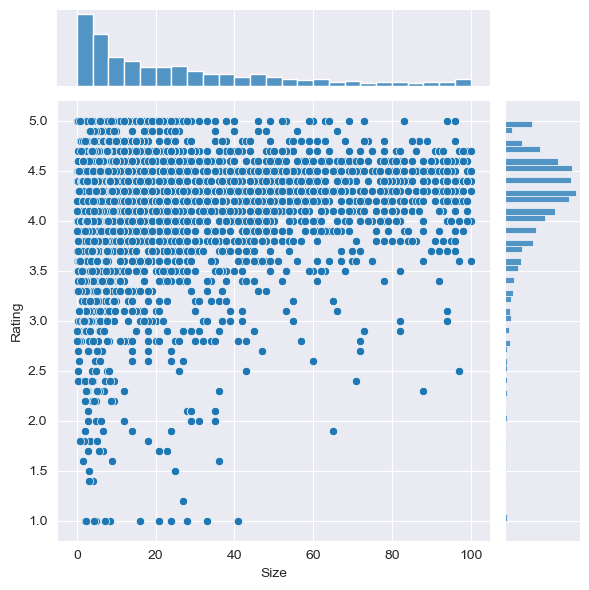

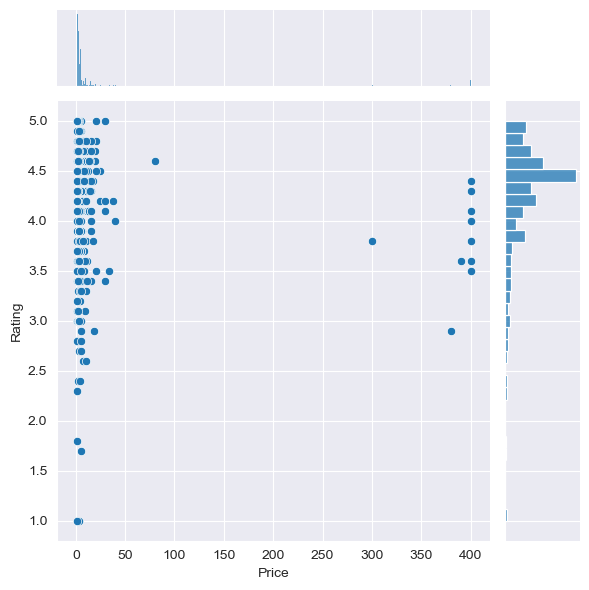

In [6]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Selecting rows where both 'Rating' and 'Size' values are present (ie. the two values are not null)
apps_with_size_and_rating_present = apps[apps['Rating'].notna() & apps['Size'].notna()]
# Subset for categories with at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby('Category').filter(lambda x: len(x) >= 250)

# Plotting size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'])

# Selecting apps whose 'Type' is 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type']=='Paid']

# Plotting price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

## 7. Relation between app category and app price

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


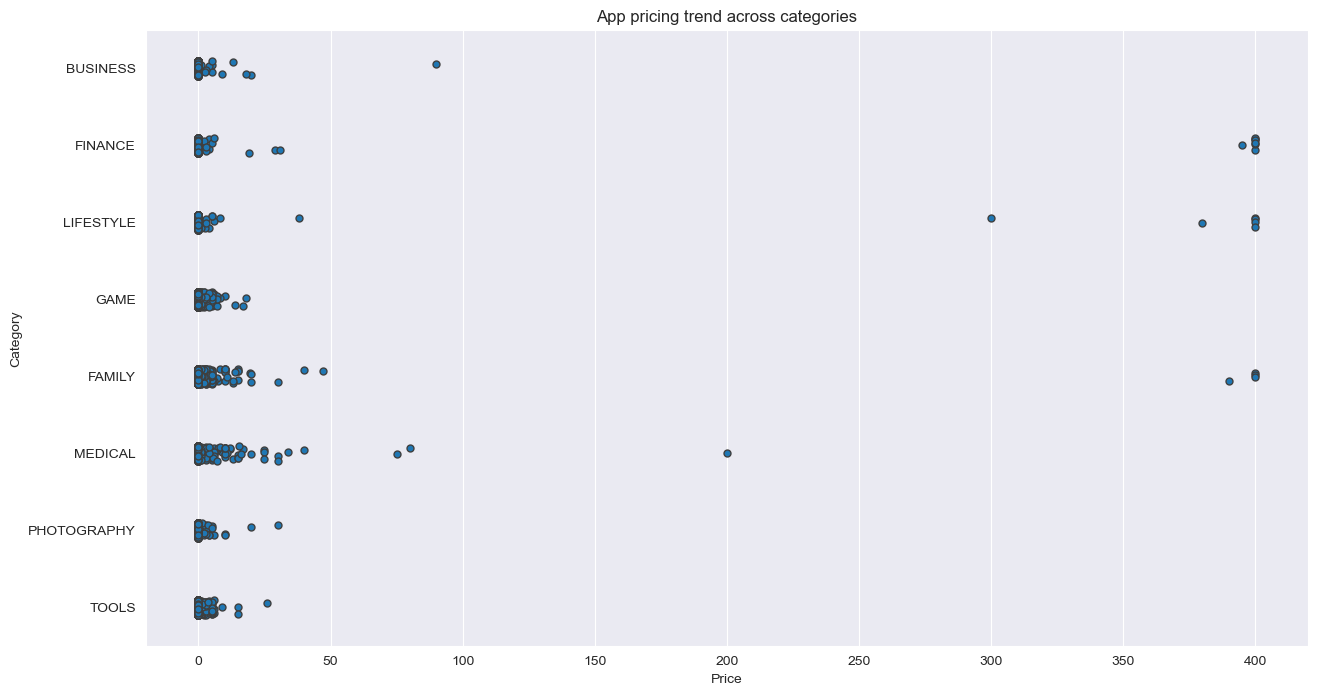

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Selecting a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats["Price"], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
apps_above_200 = apps[apps["Price"]>200]
apps_above_200[['Category', 'App', 'Price']]

## 8. Filter out "junk" apps
<p>It looks like a bunch of the really expensive apps are "junk" apps. That is, apps that don't really have a purpose. Some app developer may create an app called <em>I Am Rich Premium</em> or <em>most expensive app (H)</em>

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

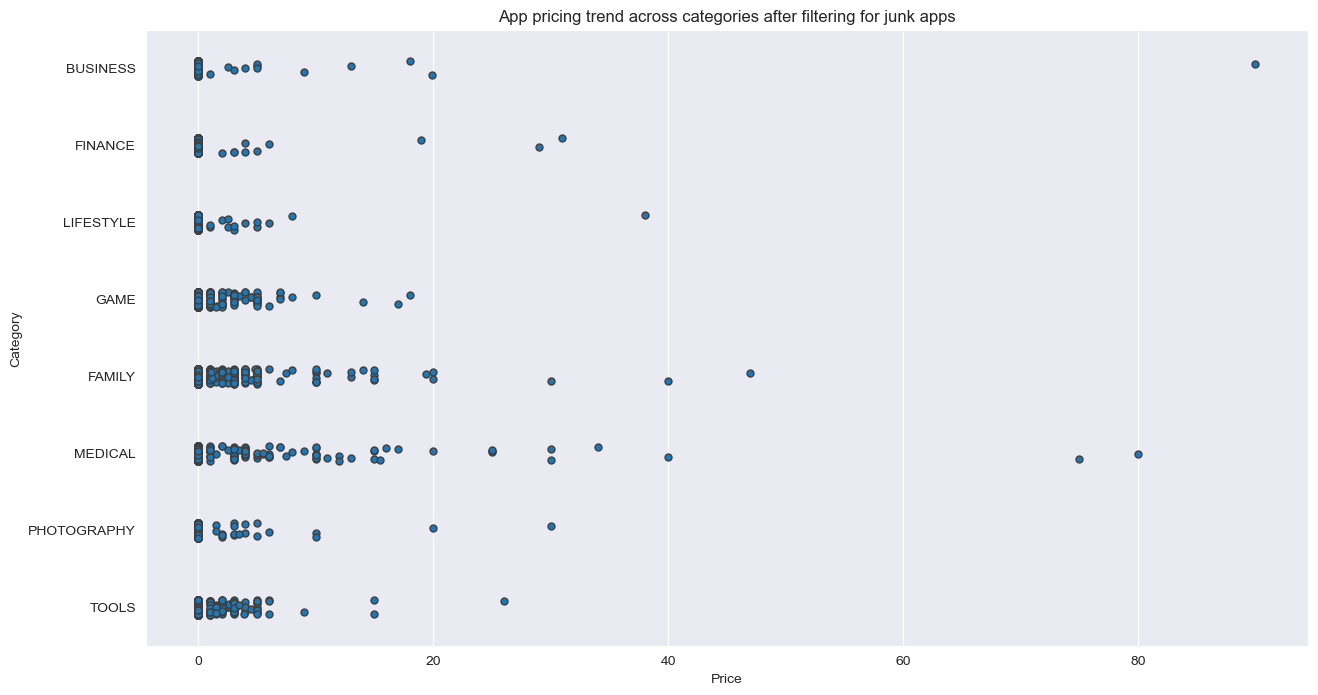

In [8]:
# Selecting apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats["Price"]<100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps (apps_under_100)
ax = sns.stripplot(x = apps_under_100['Price'], y = apps_under_100['Category'], data = apps_under_100, jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

## 9. Popularity of paid apps vs free apps
<p>For apps in the Play Store today, there are five types of pricing strategies: free, freemium, paid, paymium, and subscription. Let's focus on free and paid apps only. Some characteristics of free apps are:</p>
<ul>
<li>Free to download.</li>
<li>Main source of income often comes from advertisements.</li>
<li>Often created by companies that have other products and the app serves as an extension of those products.</li>
<li>Can serve as a tool for customer retention, communication, and customer service.</li>
</ul>
<p>Some characteristics of paid apps are:</p>
<ul>
<li>Users are asked to pay once for the app to download and use it.</li>
<li>The user can't really get a feel for the app before buying it.</li>
</ul>

In [9]:
trace0 = go.Box(
    # Data for paid apps
    y = apps[apps['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y = apps[apps['Type'] == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(title = "Log number of downloads",
                type = 'log',
                autorange = True)
)

# Adding trace0 and trace1 to a list for plotting
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

## 10. Sentiment analysis of user reviews
<p>Mining user review data to determine how people feel about your product, brand, or service can be done using a technique called sentiment analysis. User reviews for apps can be analyzed to identify if the mood is positive, negative or neutral about that app. For example, positive words in an app review might include words such as 'amazing', 'friendly', 'good', 'great', and 'love'. Negative words might be words like 'malware', 'hate', 'problem', 'refund', and 'incompetent'.</p>
<p>By plotting sentiment polarity scores of user reviews for paid and free apps, we observe that free apps receive a lot of harsh comments, as indicated by the outliers on the negative y-axis. Reviews for paid apps appear never to be extremely negative. This may indicate something about app quality, i.e., paid apps being of higher quality than free apps on average. The median polarity score for paid apps is a little higher than free apps, thereby syncing with our previous observation.</p>

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

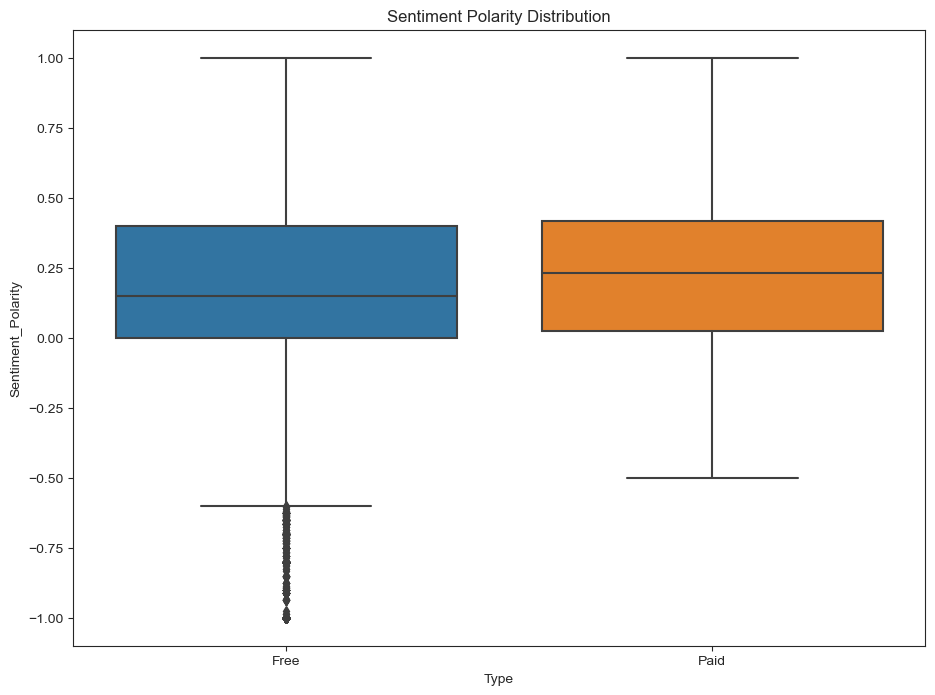

In [10]:
# Loading user_reviews.csv
reviews_df = pd.read_csv("datasets/user_reviews.csv")

# Joinning the two dataframes
merged_df = apps.merge(reviews_df)

# Dropping NA values from Sentiment and Review columns
merged_df = merged_df.dropna(subset = ['Sentiment', 'Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = merged_df['Type'], y = merged_df['Sentiment_Polarity'], data = merged_df)
ax.set_title('Sentiment Polarity Distribution')